# Rossmann Store Sales - Exploratory Data Analysis

This notebook performs preliminary data exploration of the Rossmann store sales dataset.

## Objective
Analyze historical sales data for 1,115 Rossmann stores to understand patterns, trends, and data quality.

## 1. Import Libraries and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

In [2]:
# Load datasets
train = pd.read_csv('data/rossmann-store-sales/train.csv')
store = pd.read_csv('data/rossmann-store-sales/store.csv')
test = pd.read_csv('data/rossmann-store-sales/test.csv')

print("Data loaded successfully!")
print(f"Training set shape: {train.shape}")
print(f"Store info shape: {store.shape}")
print(f"Test set shape: {test.shape}")

Data loaded successfully!
Training set shape: (1017209, 9)
Store info shape: (1115, 10)
Test set shape: (41088, 8)


## 2. Initial Data Inspection

In [3]:
# Display first few rows of training data
print("Training Data Sample:")
train.head(10)

Training Data Sample:


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [4]:
# Display first few rows of store data
print("Store Data Sample:")
store.head(10)

Store Data Sample:


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.00,9.00,2008.00,0,NaN,NaN,NaN
1,2,a,a,570.00,11.00,2007.00,1,13.00,2010.00,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.00,12.00,2006.00,1,14.00,2011.00,"Jan,Apr,Jul,Oct"
3,4,c,c,620.00,9.00,2009.00,0,NaN,NaN,NaN
4,5,a,a,29910.00,4.00,2015.00,0,NaN,NaN,NaN
5,6,a,a,310.00,12.00,2013.00,0,NaN,NaN,NaN
6,7,a,c,24000.00,4.00,2013.00,0,NaN,NaN,NaN
7,8,a,a,7520.00,10.00,2014.00,0,NaN,NaN,NaN
8,9,a,c,2030.00,8.00,2000.00,0,NaN,NaN,NaN
9,10,a,a,3160.00,9.00,2009.00,0,NaN,NaN,NaN


In [5]:
# Basic information about the datasets
print("Training Data Info:")
print(train.info())
print("\n" + "="*50 + "\n")
print("Store Data Info:")
print(store.info())

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
None


Store Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType         

In [6]:
# Statistical summary
print("Training Data - Numerical Summary:")
train.describe()

Training Data - Numerical Summary:


,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00
mean,558.43,4.00,5773.82,633.15,0.83,0.38,0.18
std,321.91,2.00,3849.93,464.41,0.38,0.49,0.38
min,1.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,280.00,2.00,3727.00,405.00,1.00,0.00,0.00
50%,558.00,4.00,5744.00,609.00,1.00,0.00,0.00
75%,838.00,6.00,7856.00,837.00,1.00,1.00,0.00
max,1115.00,7.00,41551.00,7388.00,1.00,1.00,1.00


In [7]:
print("Store Data - Numerical Summary:")
store.describe()

Store Data - Numerical Summary:


,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00,1112.00,761.00,761.00,1115.00,571.00,571.00
mean,558.00,5404.90,7.22,2008.67,0.51,23.60,2011.76
std,322.02,7663.17,3.21,6.20,0.50,14.14,1.67
min,1.00,20.00,1.00,1900.00,0.00,1.00,2009.00
25%,279.50,717.50,4.00,2006.00,0.00,13.00,2011.00
50%,558.00,2325.00,8.00,2010.00,1.00,22.00,2012.00
75%,836.50,6882.50,10.00,2013.00,1.00,37.00,2013.00
max,1115.00,75860.00,12.00,2015.00,1.00,50.00,2015.00


## 3. Data Quality Check

In [8]:
# Check for missing values in training data
print("Missing Values in Training Data:")
train_missing = train.isnull().sum()
train_missing_pct = (train_missing / len(train)) * 100
missing_train_df = pd.DataFrame({
    'Missing Count': train_missing,
    'Percentage': train_missing_pct
}).sort_values('Missing Count', ascending=False)
print(missing_train_df[missing_train_df['Missing Count'] > 0])

Missing Values in Training Data:
Empty DataFrame
Columns: [Missing Count, Percentage]
Index: []


In [9]:
# Check for missing values in store data
print("Missing Values in Store Data:")
store_missing = store.isnull().sum()
store_missing_pct = (store_missing / len(store)) * 100
missing_store_df = pd.DataFrame({
    'Missing Count': store_missing,
    'Percentage': store_missing_pct
}).sort_values('Missing Count', ascending=False)
print(missing_store_df[missing_store_df['Missing Count'] > 0])

Missing Values in Store Data:
                           Missing Count  Percentage
Promo2SinceWeek                      544       48.79
Promo2SinceYear                      544       48.79
PromoInterval                        544       48.79
CompetitionOpenSinceMonth            354       31.75
CompetitionOpenSinceYear             354       31.75
CompetitionDistance                    3        0.27


In [10]:
# Check for duplicate rows
print(f"Duplicate rows in training data: {train.duplicated().sum()}")
print(f"Duplicate rows in store data: {store.duplicated().sum()}")

Duplicate rows in training data: 0
Duplicate rows in store data: 0


## 4. Date Analysis

In [11]:
# Convert Date column to datetime
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

# Extract date features
train['Year'] = train['Date'].dt.year
train['Month'] = train['Date'].dt.month
train['Day'] = train['Date'].dt.day
train['WeekOfYear'] = train['Date'].dt.isocalendar().week

print("Date range in training data:")
print(f"Start: {train['Date'].min()}")
print(f"End: {train['Date'].max()}")
print(f"Total days: {(train['Date'].max() - train['Date'].min()).days}")

print("\nDate range in test data:")
print(f"Start: {test['Date'].min()}")
print(f"End: {test['Date'].max()}")
print(f"Total days: {(test['Date'].max() - test['Date'].min()).days}")

Date range in training data:
Start: 2013-01-01 00:00:00
End: 2015-07-31 00:00:00
Total days: 941

Date range in test data:
Start: 2015-08-01 00:00:00
End: 2015-09-17 00:00:00
Total days: 47


In [12]:
# Check data distribution by year
print("Records per year:")
print(train['Year'].value_counts().sort_index())

Records per year:
Year
2013    406974
2014    373855
2015    236380
Name: count, dtype: int64


## 5. Sales Analysis

In [13]:
# Sales distribution
print("Sales Statistics:")
print(f"Mean Sales: ${train['Sales'].mean():.2f}")
print(f"Median Sales: ${train['Sales'].median():.2f}")
print(f"Std Dev: ${train['Sales'].std():.2f}")
print(f"Min Sales: ${train['Sales'].min():.2f}")
print(f"Max Sales: ${train['Sales'].max():.2f}")

# Check for zero sales
zero_sales = (train['Sales'] == 0).sum()
print(f"\nRecords with zero sales: {zero_sales} ({zero_sales/len(train)*100:.2f}%)")

Sales Statistics:
Mean Sales: $5773.82
Median Sales: $5744.00
Std Dev: $3849.93
Min Sales: $0.00
Max Sales: $41551.00

Records with zero sales: 172871 (16.99%)


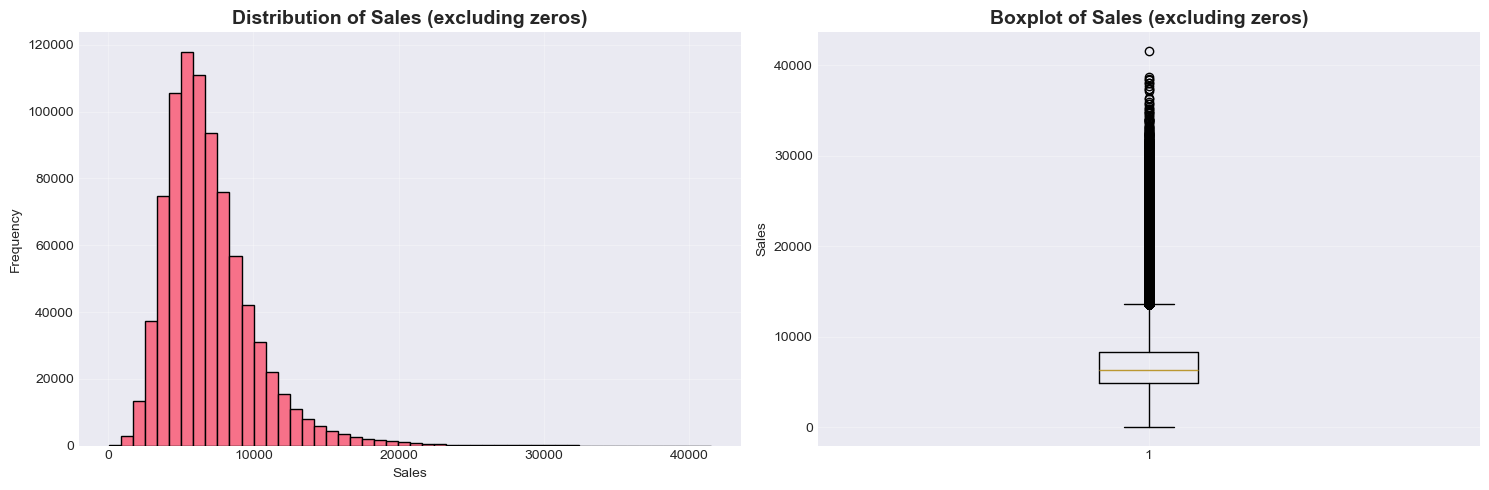

In [14]:
# Visualize sales distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram of sales
axes[0].hist(train[train['Sales'] > 0]['Sales'], bins=50, edgecolor='black')
axes[0].set_title('Distribution of Sales (excluding zeros)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Sales')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, alpha=0.3)

# Boxplot of sales
axes[1].boxplot(train[train['Sales'] > 0]['Sales'], vert=True)
axes[1].set_title('Boxplot of Sales (excluding zeros)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Sales')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Sales by Day of Week:
             mean  median         sum   count
DayOfWeek                                    
1         7809.04 7310.00  1130203012  144730
2         7005.24 6463.00  1020411930  145664
3         6555.88 6133.00   954962863  145665
4         6247.58 6020.00   911177709  145845
5         6723.27 6434.00   980555941  145845
6         5847.56 5410.00   846317735  144730
7          204.18    0.00    29551433  144730


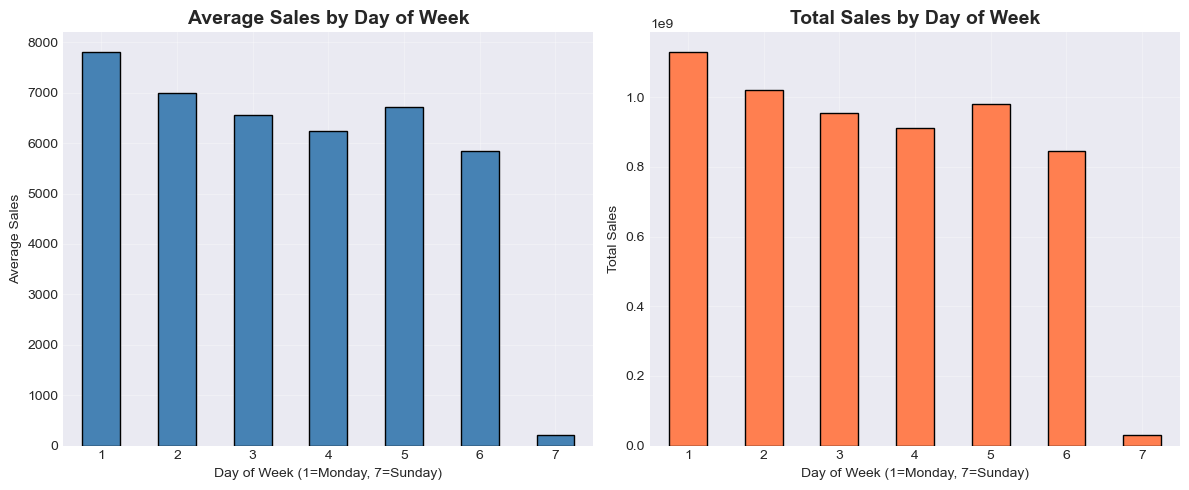

In [15]:
# Sales by day of week
sales_by_dow = train.groupby('DayOfWeek')['Sales'].agg(['mean', 'median', 'sum', 'count'])
print("Sales by Day of Week:")
print(sales_by_dow)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sales_by_dow['mean'].plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Average Sales by Day of Week', fontsize=14, fontweight='bold')
plt.xlabel('Day of Week (1=Monday, 7=Sunday)')
plt.ylabel('Average Sales')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
sales_by_dow['sum'].plot(kind='bar', color='coral', edgecolor='black')
plt.title('Total Sales by Day of Week', fontsize=14, fontweight='bold')
plt.xlabel('Day of Week (1=Monday, 7=Sunday)')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Store Analysis

In [16]:
# Number of unique stores
print(f"Number of unique stores in training data: {train['Store'].nunique()}")
print(f"Number of stores in store data: {len(store)}")

# Store types distribution
print("\nStore Type Distribution:")
print(store['StoreType'].value_counts())

print("\nAssortment Type Distribution:")
print(store['Assortment'].value_counts())

Number of unique stores in training data: 1115
Number of stores in store data: 1115

Store Type Distribution:
StoreType
a    602
d    348
c    148
b     17
Name: count, dtype: int64

Assortment Type Distribution:
Assortment
a    593
c    513
b      9
Name: count, dtype: int64


In [17]:
# Merge training data with store information
train_full = train.merge(store, on='Store', how='left')
print(f"Merged dataset shape: {train_full.shape}")
print("\nSample of merged data:")
train_full.head()

Merged dataset shape: (1017209, 22)

Sample of merged data:


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,31,c,a,1270.00,9.00,2008.00,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,31,a,a,570.00,11.00,2007.00,1,13.00,2010.00,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,31,a,a,14130.00,12.00,2006.00,1,14.00,2011.00,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,31,c,c,620.00,9.00,2009.00,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,31,a,a,29910.00,4.00,2015.00,0,NaN,NaN,NaN


In [18]:
# Sales by store type
sales_by_store_type = train_full.groupby('StoreType')['Sales'].agg(['mean', 'median', 'sum', 'count'])
print("Sales by Store Type:")
print(sales_by_store_type)

# Sales by assortment type
sales_by_assortment = train_full.groupby('Assortment')['Sales'].agg(['mean', 'median', 'sum', 'count'])
print("\nSales by Assortment Type:")
print(sales_by_assortment)

Sales by Store Type:
              mean  median         sum   count
StoreType                                     
a          5738.18 5618.00  3165334859  551627
b         10058.84 9025.50   159231395   15830
c          5723.63 5766.00   783221426  136840
d          5641.82 5826.00  1765392943  312912

Sales by Assortment Type:
              mean  median         sum   count
Assortment                                    
a          5481.03 5463.00  2945750070  537445
b          8553.93 8026.50    70946312    8294
c          6058.68 6039.00  2856484241  471470


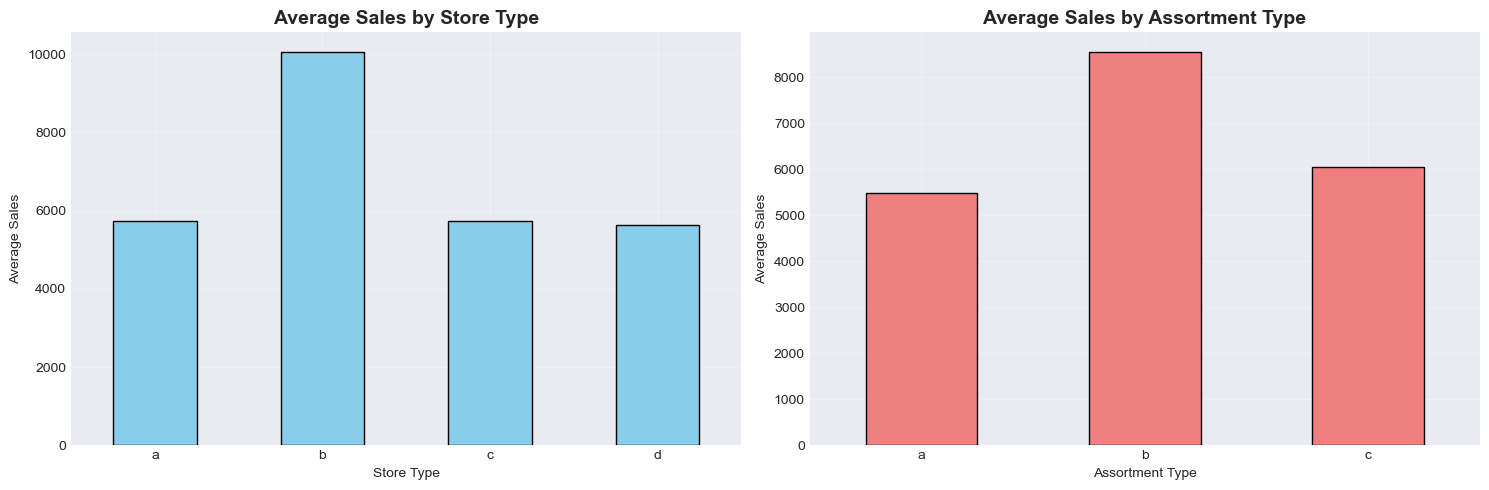

In [19]:
# Visualize sales by store characteristics
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sales_by_store_type['mean'].plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Average Sales by Store Type', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Store Type')
axes[0].set_ylabel('Average Sales')
axes[0].tick_params(axis='x', rotation=0)
axes[0].grid(True, alpha=0.3)

sales_by_assortment['mean'].plot(kind='bar', ax=axes[1], color='lightcoral', edgecolor='black')
axes[1].set_title('Average Sales by Assortment Type', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Assortment Type')
axes[1].set_ylabel('Average Sales')
axes[1].tick_params(axis='x', rotation=0)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Open/Close Status Analysis

In [20]:
# Open/Close distribution
print("Store Open/Close Distribution:")
print(train['Open'].value_counts())
print(f"\nPercentage of days stores were open: {(train['Open'].sum()/len(train)*100):.2f}%")

# Sales when open vs closed
print("\nSales statistics by Open status:")
print(train.groupby('Open')['Sales'].describe())

Store Open/Close Distribution:
Open
1    844392
0    172817
Name: count, dtype: int64

Percentage of days stores were open: 83.01%

Sales statistics by Open status:
         count    mean     std  min     25%     50%     75%      max
Open                                                                
0    172817.00    0.00    0.00 0.00    0.00    0.00    0.00     0.00
1    844392.00 6955.51 3104.21 0.00 4859.00 6369.00 8360.00 41551.00


## 8. Promo Analysis

In [21]:
# Promo distribution
print("Promo Distribution:")
print(train['Promo'].value_counts())
print(f"\nPercentage of days with promo: {(train['Promo'].sum()/len(train)*100):.2f}%")

# Sales with and without promo
sales_by_promo = train[train['Open'] == 1].groupby('Promo')['Sales'].agg(['mean', 'median', 'count'])
print("\nSales by Promo (when stores are open):")
print(sales_by_promo)

# Calculate percentage difference
promo_lift = ((sales_by_promo.loc[1, 'mean'] - sales_by_promo.loc[0, 'mean']) / 
              sales_by_promo.loc[0, 'mean'] * 100)
print(f"\nPromo lift in average sales: {promo_lift:.2f}%")

Promo Distribution:
Promo
0    629129
1    388080
Name: count, dtype: int64

Percentage of days with promo: 38.15%

Sales by Promo (when stores are open):
         mean  median   count
Promo                        
0     5929.41 5459.00  467496
1     8228.28 7649.00  376896

Promo lift in average sales: 38.77%


In [22]:
# Promo2 analysis
print("Promo2 Distribution in Store Data:")
print(store['Promo2'].value_counts())
print(f"\nPercentage of stores participating in Promo2: {(store['Promo2'].sum()/len(store)*100):.2f}%")

Promo2 Distribution in Store Data:
Promo2
1    571
0    544
Name: count, dtype: int64

Percentage of stores participating in Promo2: 51.21%


## 9. Holiday Analysis

In [23]:
# State holiday distribution
print("State Holiday Distribution:")
print(train['StateHoliday'].value_counts())

# School holiday distribution
print("\nSchool Holiday Distribution:")
print(train['SchoolHoliday'].value_counts())

# Sales by state holiday type
sales_by_holiday = train[train['Open'] == 1].groupby('StateHoliday')['Sales'].agg(['mean', 'median', 'count'])
print("\nSales by State Holiday (when stores are open):")
print(sales_by_holiday)

State Holiday Distribution:
StateHoliday
0    855087
0    131072
a     20260
b      6690
c      4100
Name: count, dtype: int64

School Holiday Distribution:
SchoolHoliday
0    835488
1    181721
Name: count, dtype: int64

Sales by State Holiday (when stores are open):
                mean  median   count
StateHoliday                        
0            6701.49 6163.00  112140
0            6992.16 6400.00  731342
a            8487.47 7556.00     694
b            9887.89 8423.00     145
c            9743.75 8397.00      71

Sales by State Holiday (when stores are open):
                mean  median   count
StateHoliday                        
0            6701.49 6163.00  112140
0            6992.16 6400.00  731342
a            8487.47 7556.00     694
b            9887.89 8423.00     145
c            9743.75 8397.00      71


In [24]:
# Sales by school holiday
sales_by_school_holiday = train[train['Open'] == 1].groupby('SchoolHoliday')['Sales'].agg(['mean', 'median', 'count'])
print("Sales by School Holiday (when stores are open):")
print(sales_by_school_holiday)

Sales by School Holiday (when stores are open):
                 mean  median   count
SchoolHoliday                        
0             6896.78 6326.00  680935
1             7200.18 6562.00  163457


## 10. Customer Analysis

In [25]:
# Customer statistics
print("Customer Statistics:")
print(f"Mean Customers: {train['Customers'].mean():.0f}")
print(f"Median Customers: {train['Customers'].median():.0f}")
print(f"Std Dev: {train['Customers'].std():.0f}")
print(f"Min Customers: {train['Customers'].min():.0f}")
print(f"Max Customers: {train['Customers'].max():.0f}")

Customer Statistics:
Mean Customers: 633
Median Customers: 609
Std Dev: 464
Min Customers: 0
Max Customers: 7388


Correlation between Sales and Customers (when stores are open):
           Sales  Customers
Sales       1.00       0.82
Customers   0.82       1.00


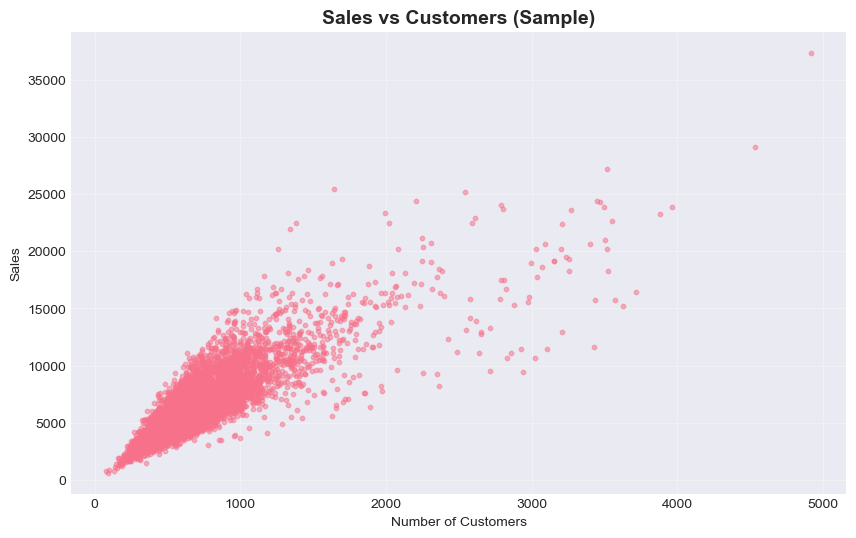

In [26]:
# Correlation between Sales and Customers
correlation = train[train['Open'] == 1][['Sales', 'Customers']].corr()
print("Correlation between Sales and Customers (when stores are open):")
print(correlation)

# Scatter plot
plt.figure(figsize=(10, 6))
sample_data = train[(train['Open'] == 1) & (train['Sales'] > 0)].sample(n=min(5000, len(train)))
plt.scatter(sample_data['Customers'], sample_data['Sales'], alpha=0.5, s=10)
plt.title('Sales vs Customers (Sample)', fontsize=14, fontweight='bold')
plt.xlabel('Number of Customers')
plt.ylabel('Sales')
plt.grid(True, alpha=0.3)
plt.show()

## 11. Competition Analysis

Competition Distance Statistics:
count    1112.00
mean     5404.90
std      7663.17
min        20.00
25%       717.50
50%      2325.00
75%      6882.50
max     75860.00
Name: CompetitionDistance, dtype: float64

Stores with missing competition distance: 3


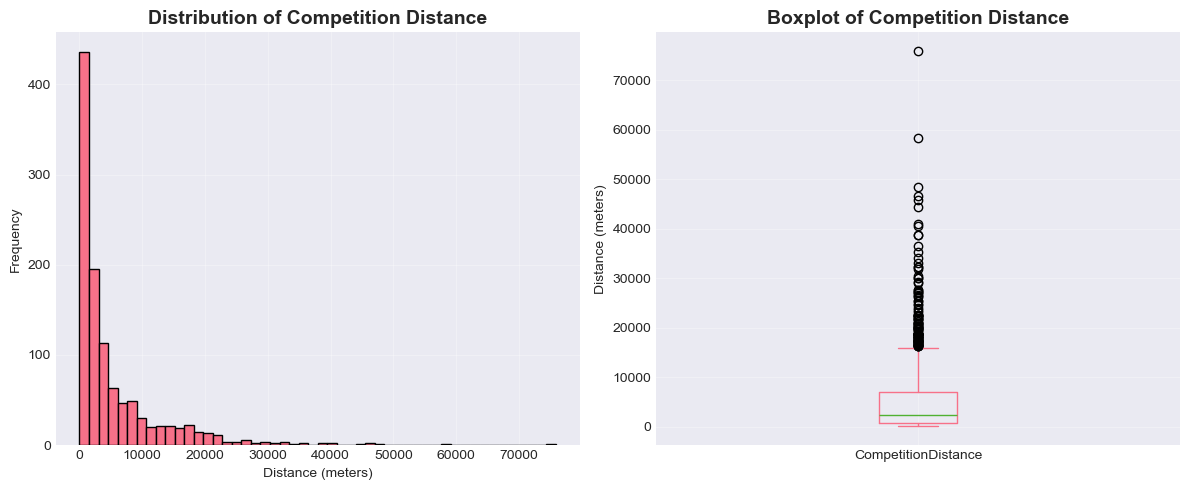

In [27]:
# Competition distance statistics
print("Competition Distance Statistics:")
print(store['CompetitionDistance'].describe())

# Stores with missing competition distance
missing_comp = store['CompetitionDistance'].isnull().sum()
print(f"\nStores with missing competition distance: {missing_comp}")

# Visualize competition distance distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
store['CompetitionDistance'].dropna().hist(bins=50, edgecolor='black')
plt.title('Distribution of Competition Distance', fontsize=14, fontweight='bold')
plt.xlabel('Distance (meters)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
store['CompetitionDistance'].dropna().plot(kind='box', vert=True)
plt.title('Boxplot of Competition Distance', fontsize=14, fontweight='bold')
plt.ylabel('Distance (meters)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 12. Temporal Sales Trends

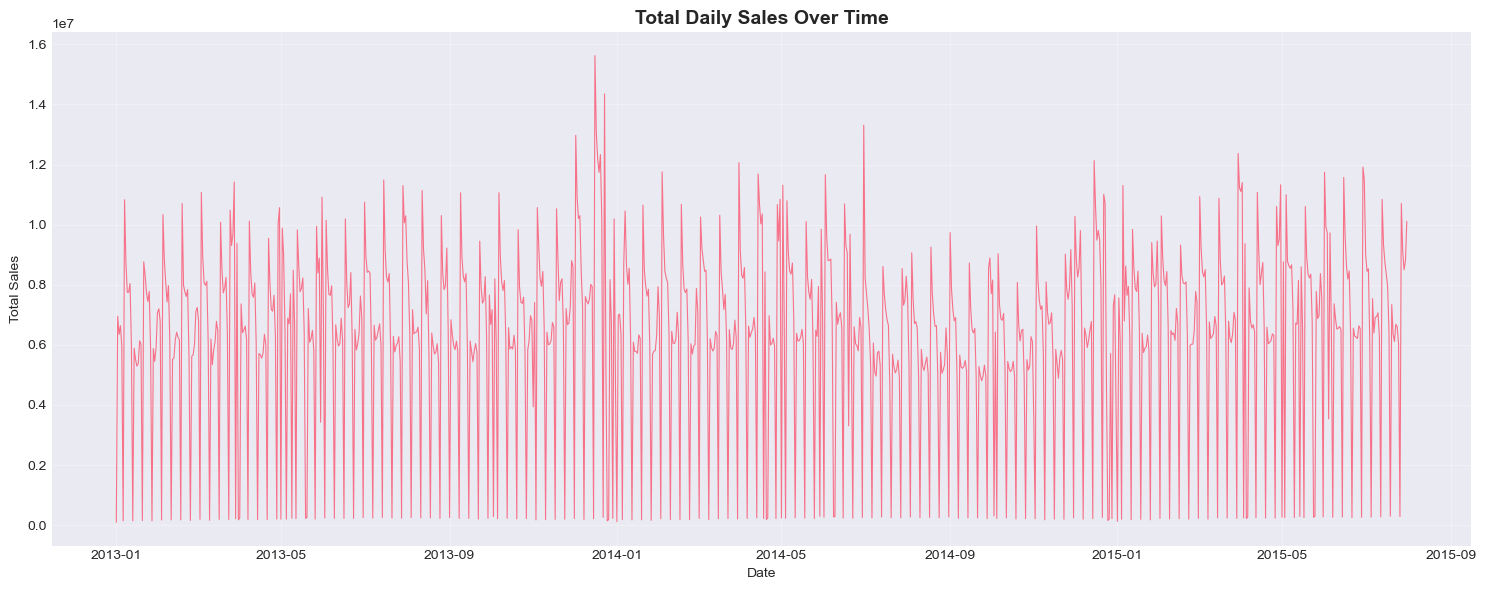

In [28]:
# Daily sales over time
daily_sales = train.groupby('Date')['Sales'].sum().reset_index()

plt.figure(figsize=(15, 6))
plt.plot(daily_sales['Date'], daily_sales['Sales'], linewidth=0.8)
plt.title('Total Daily Sales Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

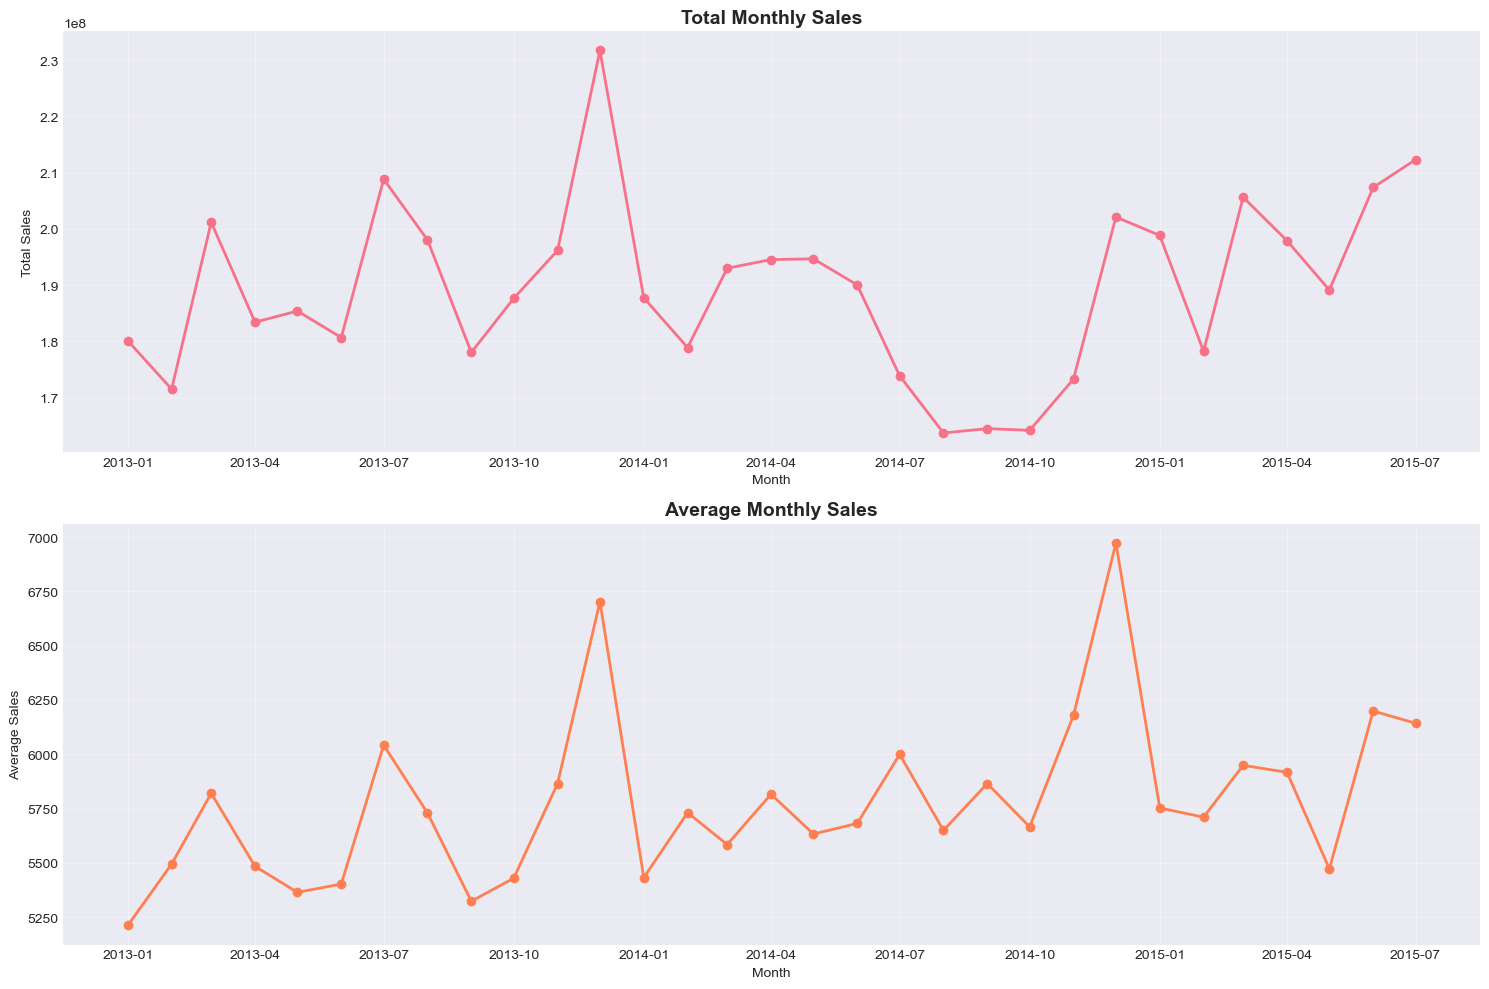

In [29]:
# Monthly sales trends
monthly_sales = train.groupby([train['Date'].dt.to_period('M')])['Sales'].agg(['sum', 'mean']).reset_index()
monthly_sales['Date'] = monthly_sales['Date'].dt.to_timestamp()

fig, axes = plt.subplots(2, 1, figsize=(15, 10))

axes[0].plot(monthly_sales['Date'], monthly_sales['sum'], marker='o', linewidth=2)
axes[0].set_title('Total Monthly Sales', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Total Sales')
axes[0].grid(True, alpha=0.3)

axes[1].plot(monthly_sales['Date'], monthly_sales['mean'], marker='o', linewidth=2, color='coral')
axes[1].set_title('Average Monthly Sales', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Average Sales')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Sales by Month:
         mean        sum
Month                   
1     5465.40  566728724
2     5645.25  528734410
3     5784.58  599831906
4     5738.87  575895295
5     5489.64  569248217
6     5760.96  578112775
7     6064.92  595059205
8     5693.02  361791202
9     5570.25  342570131
10    5537.04  351878728
11    6008.11  369498877
12    6826.61  433831153


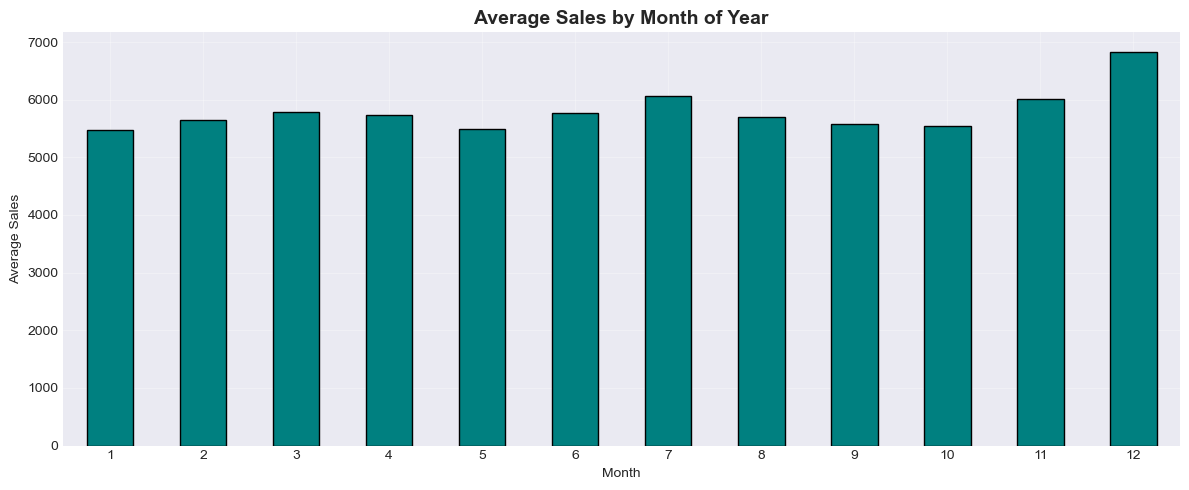

In [30]:
# Sales by month of year (seasonality)
sales_by_month = train.groupby('Month')['Sales'].agg(['mean', 'sum'])
print("Sales by Month:")
print(sales_by_month)

plt.figure(figsize=(12, 5))
sales_by_month['mean'].plot(kind='bar', color='teal', edgecolor='black')
plt.title('Average Sales by Month of Year', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 13. Summary of Key Findings

In [31]:
print("="*80)
print("KEY FINDINGS FROM EXPLORATORY DATA ANALYSIS")
print("="*80)

print("\n1. DATASET OVERVIEW:")
print(f"   - Training records: {len(train):,}")
print(f"   - Unique stores: {train['Store'].nunique()}")
print(f"   - Date range: {train['Date'].min().date()} to {train['Date'].max().date()}")

print("\n2. MISSING DATA:")
print(f"   - Training data: {train.isnull().sum().sum()} missing values")
print(f"   - Store data: {store.isnull().sum().sum()} missing values")

print("\n3. SALES PATTERNS:")
print(f"   - Average daily sales: ${train['Sales'].mean():.2f}")
print(f"   - Median daily sales: ${train['Sales'].median():.2f}")
print(f"   - Records with zero sales: {(train['Sales'] == 0).sum():,} ({(train['Sales'] == 0).sum()/len(train)*100:.2f}%)")

print("\n4. STORE OPERATIONS:")
print(f"   - Stores open: {(train['Open'].sum()/len(train)*100):.2f}% of the time")
print(f"   - Days with promotions: {(train['Promo'].sum()/len(train)*100):.2f}%")

print("\n5. CORRELATION:")
corr_value = train[train['Open'] == 1][['Sales', 'Customers']].corr().iloc[0, 1]
print(f"   - Sales vs Customers correlation: {corr_value:.4f}")

print("\n" + "="*80)

KEY FINDINGS FROM EXPLORATORY DATA ANALYSIS

1. DATASET OVERVIEW:
   - Training records: 1,017,209
   - Unique stores: 1115
   - Date range: 2013-01-01 to 2015-07-31

2. MISSING DATA:
   - Training data: 0 missing values
   - Store data: 2343 missing values

3. SALES PATTERNS:
   - Average daily sales: $5773.82
   - Median daily sales: $5744.00
   - Records with zero sales: 172,871 (16.99%)

4. STORE OPERATIONS:
   - Stores open: 83.01% of the time
   - Days with promotions: 38.15%

5. CORRELATION:
   - Sales vs Customers correlation: 0.8236

   - Sales vs Customers correlation: 0.8236



## Next Steps

Based on this exploratory analysis, potential next steps include:

1. **Feature Engineering**: Create additional features such as:
   - Days since/until promotion
   - Days since competition opened
   - Rolling averages and lag features
   - Holiday proximity features

2. **Handle Missing Data**: Develop strategies for imputing missing values in competition and promo data

3. **Outlier Analysis**: Investigate unusual sales patterns and potential outliers

4. **Store Clustering**: Group stores with similar characteristics for better modeling

5. **Model Development**: Build and compare different forecasting models (e.g., time series, regression, ensemble methods)